In [67]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt

# Presenting Data

In [68]:
df = pd.read_csv("redditlistener.csv")
df['Collected_UTC'] = pd.to_datetime(df['Collected_UTC'], format='%Y-%m-%d %H:%M:%S')

In [69]:
df

,Author,ID,Submission,Body,Subreddit,Created_UTC,Collected_UTC
0,bens676,j037ofm,zl3v77,And what harm was done to the child?,AskUK,2022-12-13 19:29:12,2022-12-13 19:29:25.586402+00:00
1,BarryTownCouncil,j037oha,zl3jtn,WOOP! Caws Cenarth massive! It's no Perl Las b...,AskUK,2022-12-13 19:29:13,2022-12-13 19:29:25.586991+00:00
2,globallyfantastic,j037or5,zl45do,Oh and did you get them redone?,AskUK,2022-12-13 19:29:16,2022-12-13 19:29:27.581015+00:00
3,metalliska,j037p2z,zl4152,https://www.youtube.com/watch?v=s-UjB94LyYY,AskAnAmerican,2022-12-13 19:29:19,2022-12-13 19:29:32.364515+00:00
4,Jacquazar,j037p57,zkugzm,This pisses me of on a personal level. I have ...,AskUK,2022-12-13 19:29:20,2022-12-13 19:29:32.364850+00:00
...,...,...,...,...,...,...,...
16846,MrsBarnes1988,j08ckf8,zm0vx5,Short for duplicate I think - an “own brand” v...,AskUK,2022-12-14 20:18:07,2022-12-14 20:18:18.786801+00:00
16847,BobbieBadeBew2,j08ckg7,zljtq7,I have never heard the term americentric befor...,AskAnAmerican,2022-12-14 20:18:07,2022-12-14 20:18:18.786945+00:00
16848,honbontattoo,j08ckjb,zlqutx,Doesn't matter if you spend £1. They are huge ...,AskUK,2022-12-14 20:18:08,2022-12-14 20:18:18.955678+00:00
16849,Trekfieldsandnovas,j08ckx8,zlqutx,These places are run by volunteers so the coun...,AskUK,2022-12-14 20:18:12,2022-12-14 20:18:23.698881+00:00


# Task 1.2 - Data analyses using pandas/numpy

## A.1 Number of unique users in AskUK

### Tumbling Window

In [70]:
## Get the subreddit
askUKdf = df[df['Subreddit'] == 'AskUK']
## Drop 1Column for the necessary question
askUKdf = askUKdf[['Author','Collected_UTC']]
## Count number of unique users for 20mins
askUKdf1 = askUKdf.set_index('Collected_UTC').resample('20 min').nunique().reset_index()
askUKdf1.head()

,Collected_UTC,Author
0,2022-12-13 19:20:00+00:00,142
1,2022-12-13 19:40:00+00:00,234
2,2022-12-13 20:00:00+00:00,198
3,2022-12-13 20:20:00+00:00,214
4,2022-12-13 20:40:00+00:00,232


### Hopping Window

In [71]:
## Count number of unique users for 20mins with hop size 5 minutes
askUKdf2 = askUKdf.set_index('Collected_UTC').resample('5T').nunique().rolling('20T').sum()
askUKdf2 = askUKdf2.reset_index()
print(askUKdf2)

                Collected_UTC  Author
0   2022-12-13 19:25:00+00:00     9.0
1   2022-12-13 19:30:00+00:00    81.0
2   2022-12-13 19:35:00+00:00   154.0
3   2022-12-13 19:40:00+00:00   214.0
4   2022-12-13 19:45:00+00:00   267.0
..                        ...     ...
294 2022-12-14 19:55:00+00:00   170.0
295 2022-12-14 20:00:00+00:00   163.0
296 2022-12-14 20:05:00+00:00   171.0
297 2022-12-14 20:10:00+00:00   157.0
298 2022-12-14 20:15:00+00:00   155.0

[299 rows x 2 columns]


## A.2 Number of unique users in AskanAmerican

### Tumbling Window

In [72]:
## Get the subreddit
askUSAdf = df[df['Subreddit'] == 'AskAnAmerican']
## Drop 1Column for the necessary question
askUSAdf = askUSAdf[['Author','Collected_UTC']]
## Count number of unique users for 20mins
askUSAdf1 = askUSAdf.set_index('Collected_UTC').resample('20 min').nunique().reset_index()
askUSAdf1.head()

,Collected_UTC,Author
0,2022-12-13 19:20:00+00:00,38
1,2022-12-13 19:40:00+00:00,55
2,2022-12-13 20:00:00+00:00,55
3,2022-12-13 20:20:00+00:00,54
4,2022-12-13 20:40:00+00:00,63


### Hopping Window

In [73]:
## Count number of unique users for 20mins with hop size 5 minutes
askUSAdf2 = askUSAdf.set_index('Collected_UTC').resample('5T').nunique().rolling('20T').sum()
askUSAdf2.reset_index()

,Collected_UTC,Author
0,2022-12-13 19:25:00+00:00,4.0
1,2022-12-13 19:30:00+00:00,21.0
2,2022-12-13 19:35:00+00:00,40.0
3,2022-12-13 19:40:00+00:00,56.0
4,2022-12-13 19:45:00+00:00,66.0
...,...,...
294,2022-12-14 19:55:00+00:00,71.0
295,2022-12-14 20:00:00+00:00,61.0
296,2022-12-14 20:05:00+00:00,57.0
297,2022-12-14 20:10:00+00:00,51.0


In [74]:
askUSAdf2 = askUSAdf2.reset_index()

## Plotting and Comment


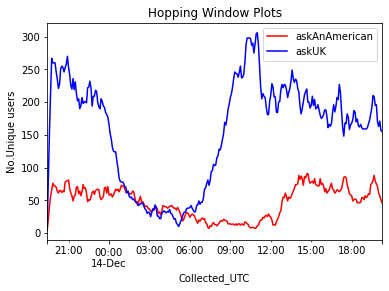

In [93]:
ax = askUSAdf2.plot(y='Author',x = 'Collected_UTC', color="r", label="askAnAmerican")
askUKdf2.plot(y='Author',x = 'Collected_UTC', color="b", label="askUK",  ax=ax)


ax.set_xlabel("Collected_UTC")
ax.set_ylabel("No.Unique users")
ax.set_title("Hopping Window Plots")
plt.show()

**Comment** : I decided to plot them using line graph. It is because the changes over time can be seen clearly on line graph. The plots of USA and UK have different patterns. Generally, subreddit AskAnAmerican tends to be more stable in the pattern and shows more increasing points over time compared to subreddit in UK. In the first quarter of the day, subreddit askUK already shows a decreasing pattern. However, askUK shows more significant change in the decreasing and increasing number of user. For example, between 00:00 - 03.00 the decreasing rate of number of user is faster in AskUK and also between 06:00 - 09.00, the increasing rate is also faster. 

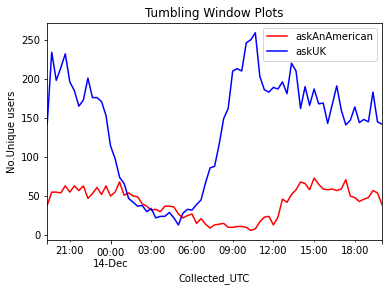

In [94]:
ax = askUSAdf1.plot(y='Author',x = 'Collected_UTC', color="r", label="askAnAmerican")
askUKdf1.plot(y='Author',x = 'Collected_UTC', color="b", label="askUK",  ax=ax)


ax.set_xlabel("Collected_UTC")
ax.set_ylabel("No.Unique users")
ax.set_title("Tumbling Window Plots")
plt.show()

**Comment** : The tumbing window plot shows similar shapes to the hopping window plots between the two subreddits. As mentioned in the previous comment, the  differences between two subreddits are the stability of the changes, the rate of change in the variable, and the patterns. However, the changes between each point are not very big which explain the smoother lines.

comment:

## B.1 Average number of words per comment in AskUK

In [77]:
## Get the subreddit
askUKdf3 = df[df['Subreddit'] == 'AskUK']
## Drop 1Column for the necessary question
comment_UK = askUKdf3[['Body','Collected_UTC']]
## Separate the words in body column and count the number of words
comment_UK["NumberofWords"] = comment_UK["Body"].apply(lambda n: len(n.split()))
comment_UK

/var/folders/y5/qb0cdykd6fb7szcqclkc5dh80000gn/T/ipykernel_969/423261891.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comment_UK["NumberofWords"] = comment_UK["Body"].apply(lambda n: len(n.split()))


,Body,Collected_UTC,NumberofWords
0,And what harm was done to the child?,2022-12-13 19:29:25.586402+00:00,8
1,WOOP! Caws Cenarth massive! It's no Perl Las b...,2022-12-13 19:29:25.586991+00:00,10
2,Oh and did you get them redone?,2022-12-13 19:29:27.581015+00:00,7
4,This pisses me of on a personal level. I have ...,2022-12-13 19:29:32.364850+00:00,203
8,"My local shop has started stocking it, I have ...",2022-12-13 19:29:39.593376+00:00,41
...,...,...,...
16845,"No, that is incorrect. There is an avian flu e...",2022-12-14 20:18:18.786511+00:00,45
16846,Short for duplicate I think - an “own brand” v...,2022-12-14 20:18:18.786801+00:00,24
16848,Doesn't matter if you spend £1. They are huge ...,2022-12-14 20:18:18.955678+00:00,29
16849,These places are run by volunteers so the coun...,2022-12-14 20:18:23.698881+00:00,24


### Tumbling Window

In [78]:
NumberWordsUK = comment_UK.set_index('Collected_UTC').resample('20 min').mean()
NumberWordsUK

,NumberofWords
Collected_UTC,
2022-12-13 19:20:00+00:00,35.508772
2022-12-13 19:40:00+00:00,36.617940
2022-12-13 20:00:00+00:00,34.586345
2022-12-13 20:20:00+00:00,31.912587
2022-12-13 20:40:00+00:00,33.019802
...,...
2022-12-14 18:40:00+00:00,29.071429
2022-12-14 19:00:00+00:00,31.095238
2022-12-14 19:20:00+00:00,32.897119


In [79]:
NumberWordsUK = NumberWordsUK.reset_index()

### Hopping Window

In [80]:
NumberWordsUK2 = comment_UK.set_index('Collected_UTC').resample('5T').nunique().rolling('20T').mean()
NumberWordsUK2.reset_index()

,Collected_UTC,Body,NumberofWords
0,2022-12-13 19:25:00+00:00,9.000000,9.000000
1,2022-12-13 19:30:00+00:00,44.500000,28.000000
2,2022-12-13 19:35:00+00:00,56.333333,34.666667
3,2022-12-13 19:40:00+00:00,60.000000,37.750000
4,2022-12-13 19:45:00+00:00,76.000000,47.000000
...,...,...,...
294,2022-12-14 19:55:00+00:00,47.750000,33.750000
295,2022-12-14 20:00:00+00:00,46.000000,33.250000
296,2022-12-14 20:05:00+00:00,46.250000,34.250000
297,2022-12-14 20:10:00+00:00,43.500000,33.250000


In [81]:
NumberWordsUK2 = NumberWordsUK2.reset_index()

## B.2 Average number of words per comment in AskAnAmerican

### Tumbling Window 

In [82]:
## Get the subreddit
askUSAdf3 = df[df['Subreddit'] == 'AskAnAmerican']
## Drop 1Column for the necessary question
comment_USA = askUSAdf3[['Body','Collected_UTC']]
## Separate the words in body column and count the number of words
comment_USA["NumberofWords"] = comment_USA["Body"].apply(lambda n: len(n.split()))
comment_USA

/var/folders/y5/qb0cdykd6fb7szcqclkc5dh80000gn/T/ipykernel_969/1376681807.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comment_USA["NumberofWords"] = comment_USA["Body"].apply(lambda n: len(n.split()))


,Body,Collected_UTC,NumberofWords
3,https://www.youtube.com/watch?v=s-UjB94LyYY,2022-12-13 19:29:32.364515+00:00,1
5,My great great great granddad founded the litt...,2022-12-13 19:29:37.418158+00:00,41
6,Your submission has been automatically removed...,2022-12-13 19:29:39.593150+00:00,68
7,Was Tom Lister Jr the US President in 5th Elem...,2022-12-13 19:29:39.593311+00:00,13
14,🤣,2022-12-13 19:30:11.010172+00:00,1
...,...,...,...
16832,Bernie Sanders for sure. I have seen a TON of ...,2022-12-14 20:17:07.945809+00:00,79
16834,I wouldn't be opposed to sharing it with our c...,2022-12-14 20:17:17.877308+00:00,17
16836,"And to be fair, it goes for right wing as well...",2022-12-14 20:17:28.007534+00:00,25
16843,"She isn't in elected office anymore, she's jus...",2022-12-14 20:18:06.811226+00:00,21


In [83]:
NumberWordsUSA = comment_USA.set_index('Collected_UTC').resample('20 min').mean()
NumberWordsUSA.reset_index()

,Collected_UTC,NumberofWords
0,2022-12-13 19:20:00+00:00,34.761905
1,2022-12-13 19:40:00+00:00,45.738095
2,2022-12-13 20:00:00+00:00,50.876923
3,2022-12-13 20:20:00+00:00,40.366197
4,2022-12-13 20:40:00+00:00,42.703297
...,...,...
70,2022-12-14 18:40:00+00:00,37.814815
71,2022-12-14 19:00:00+00:00,40.913043
72,2022-12-14 19:20:00+00:00,35.902174
73,2022-12-14 19:40:00+00:00,37.762500


In [84]:
NumberWordsUSA = NumberWordsUSA.reset_index()

### Hopping Window 

In [85]:
NumberWordsUSA2 = comment_USA.set_index('Collected_UTC').resample('5T').nunique().rolling('20T').mean()
NumberWordsUSA2.reset_index()

,Collected_UTC,Body,NumberofWords
0,2022-12-13 19:25:00+00:00,4.00,4.00
1,2022-12-13 19:30:00+00:00,11.50,11.00
2,2022-12-13 19:35:00+00:00,14.00,13.00
3,2022-12-13 19:40:00+00:00,15.00,14.25
4,2022-12-13 19:45:00+00:00,18.25,17.00
...,...,...,...
294,2022-12-14 19:55:00+00:00,20.00,16.25
295,2022-12-14 20:00:00+00:00,16.25,12.75
296,2022-12-14 20:05:00+00:00,14.75,12.00
297,2022-12-14 20:10:00+00:00,13.25,11.50


In [86]:
NumberWordsUSA2 = NumberWordsUSA.reset_index()

### Plots

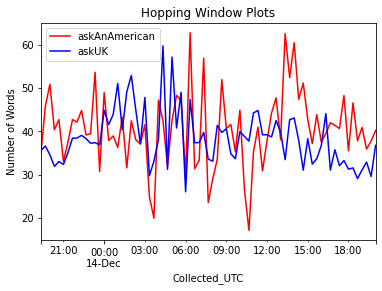

In [91]:
ax = NumberWordsUSA.plot(y='NumberofWords',x = 'Collected_UTC', color="r", label="askAnAmerican")
NumberWordsUK.plot(y='NumberofWords',x = 'Collected_UTC', color="b", label="askUK",  ax=ax)


ax.set_xlabel("Collected_UTC")
ax.set_ylabel("Number of Words")
ax.set_title("Hopping Window Plots")
plt.show()

**Comment:** The line plots between two subreddit share the same pattern. There is no very significant increase or decrease of the values over time. Although there are several noticeable peaks and through, the pattern in the next few hours follows similiar pattern which means there is a no huge gap between the peaks. 

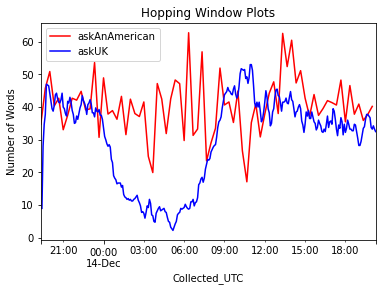

In [92]:
ax = NumberWordsUSA2.plot(y='NumberofWords',x = 'Collected_UTC', color="r", label="askAnAmerican")
NumberWordsUK2.plot(y='NumberofWords',x = 'Collected_UTC', color="b", label="askUK",  ax=ax)


ax.set_xlabel("Collected_UTC")
ax.set_ylabel("Number of Words")
ax.set_title("Hopping Window Plots")
plt.show()

**Comment** : The plots between the subreddit show different pattern. The difference is shown by the sudden increase in decreasing rate of change in number of words in subreddit AskUK. The numbers of words in subreddit askUK keeps decreasing from the time frame of 00:00 - 06:00, where in the subreddit askanAmerican, the values tends to decrease and increase in more constant rate. After 06:00, askUK shows another big increase of number of words. AskanAmerican keeps